<a href="https://colab.research.google.com/github/NathanDietrich/Artificial-Intelligence-and-Machine-Learning-portfolio/blob/main/Microsoft_Stock_Forecasting_using_LSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --upgrade --no-cache-dir

In [16]:
import datetime
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf

In [10]:
end = dt.datetime.now()
start = end - dt.timedelta(days = 13000)
start, end

(datetime.datetime(1989, 4, 14, 3, 28, 20, 203204),
 datetime.datetime(2024, 11, 16, 3, 28, 20, 203204))

In [11]:
stock = ['MSFT']

In [12]:
df = yf.download(stock, start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,,
1989-04-14 00:00:00+00:00,0.217307,0.352431,0.355903,0.342014,0.342014,62625600
1989-04-17 00:00:00+00:00,0.220518,0.357639,0.363715,0.352431,0.355903,51638400
1989-04-18 00:00:00+00:00,0.228011,0.369792,0.369792,0.361111,0.364583,69336000
1989-04-19 00:00:00+00:00,0.234969,0.381076,0.387153,0.378472,0.381944,168969600
1989-04-20 00:00:00+00:00,0.239787,0.388889,0.392361,0.378472,0.381944,138801600


In [14]:
df = df.reset_index()
df = df[['Date', 'Close']]
df

Price,Date,Close
Ticker,,MSFT
0,1989-04-14 00:00:00+00:00,0.352431
1,1989-04-17 00:00:00+00:00,0.357639
2,1989-04-18 00:00:00+00:00,0.369792
3,1989-04-19 00:00:00+00:00,0.381076
4,1989-04-20 00:00:00+00:00,0.388889
...,...,...
8963,2024-11-11 00:00:00+00:00,418.010010
8964,2024-11-12 00:00:00+00:00,423.029999
8965,2024-11-13 00:00:00+00:00,425.200012


In [24]:
# code not needed because data is not in csv
# def str_to_datetime(s):
#   split = s.split('-')
#   year, month, day = int(split[0]), int(split[1]), int(split[2])
#   return datetime.datetime(year = year, month = month, day = day)
# datetime_object = str_to_datetime('1986-03-19')
# datetime

In [23]:
#df['Date'] = df['Date'].apply(str_to_datetime)

In [22]:
df['Date']

,Date
0,1989-04-14 00:00:00+00:00
1,1989-04-17 00:00:00+00:00
2,1989-04-18 00:00:00+00:00
3,1989-04-19 00:00:00+00:00
4,1989-04-20 00:00:00+00:00
...,...
8963,2024-11-11 00:00:00+00:00
8964,2024-11-12 00:00:00+00:00
8965,2024-11-13 00:00:00+00:00
8966,2024-11-14 00:00:00+00:00


In [26]:
df.index = df.pop('Date')
df

Price,Close
Ticker,MSFT
Date,
1989-04-14 00:00:00+00:00,0.352431
1989-04-17 00:00:00+00:00,0.357639
1989-04-18 00:00:00+00:00,0.369792
1989-04-19 00:00:00+00:00,0.381076
1989-04-20 00:00:00+00:00,0.388889
...,...
2024-11-11 00:00:00+00:00,418.010010
2024-11-12 00:00:00+00:00,423.029999


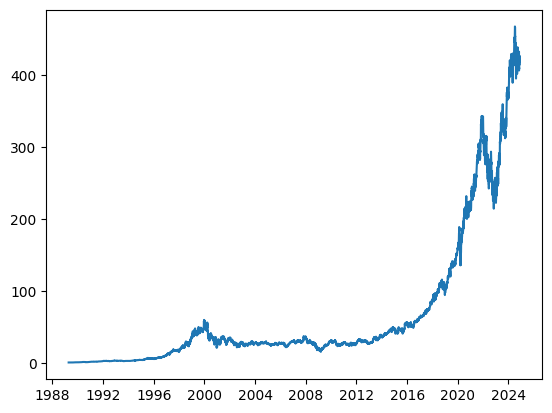

In [28]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [36]:
import pandas as pd
import numpy as np
import datetime

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):

    # Convert date strings to datetime objects
    dataframe.index = dataframe.index.tz_localize(None)

    first_date = pd.to_datetime(first_date_str).tz_localize(None)
    last_date = pd.to_datetime(last_date_str).tz_localize(None)

    target_date = first_date

    dates = []
    X, Y = [], []
    last_time = False

    while True:
        # Subset the dataframe up to the target date and get the last (n+1) rows
        df_subset = dataframe.loc[:target_date].tail(n + 1)

        # Ensure we have enough data for the window
        if len(df_subset) != n + 1:
            print(f"Error: Window size of {n} is too large for date {target_date}")
            return

        # Extract input (X) and target (y) values
        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]
        dates.append(target_date)
        X.append(x)
        Y.append(y)

        # Get the next target date (1 week ahead)
        next_week = dataframe.loc[target_date:target_date + datetime.timedelta(days=7)]
        if len(next_week) < 2:
            break

        # Extract the next date from the dataframe
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date = pd.to_datetime(next_datetime_str.split('T')[0])

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True

    # Create the output dataframe
    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    # Add windowed input features
    X = np.array(X)
    for i in range(0, n):
        ret_df[f'Target-{n-i}'] = X[:, i]

    # Add the target value
    ret_df['Target'] = Y

    return ret_df

# Example usage (replace with your actual dataframe)
# Assuming df has a datetime index and a 'Close' column
windowed_df = df_to_windowed_df(df, '2021-03-25', '2022-03-23', n=3)
print(windowed_df)

    Target Date    Target-3    Target-2    Target-1                Target
0    2021-03-25  235.990005  237.580002  235.460007  [232.33999633789062]
1    2021-03-26  237.580002  235.460007  232.339996  [236.47999572753906]
2    2021-03-29  235.460007  232.339996  236.479996  [235.24000549316406]
3    2021-03-30  232.339996  236.479996  235.240005  [231.85000610351562]
4    2021-03-31  236.479996  235.240005  231.850006  [235.77000427246094]
..          ...         ...         ...         ...                   ...
247  2022-03-17  276.440002  287.149994  294.390015   [295.2200012207031]
248  2022-03-18  287.149994  294.390015  295.220001  [300.42999267578125]
249  2022-03-21  294.390015  295.220001  300.429993   [299.1600036621094]
250  2022-03-22  295.220001  300.429993  299.160004  [304.05999755859375]
251  2022-03-23  300.429993  299.160004  304.059998    [299.489990234375]

[252 rows x 5 columns]


In [37]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:,0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1] , 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape


<ipython-input-37-539e787bd1fb>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return dates, X.astype(np.float32), Y.astype(np.float32)


((252,), (252, 3, 1), (252,))